# Predicting Movie Likes and Dislikes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.svm import SVC

In [2]:
movies = pd.read_csv('movies.csv', encoding = 'latin-1')

In [3]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


In [4]:
movies = movies.drop(columns =['country', 'rating', 'released', 'votes', 'writer', 'director', 'star'], axis =1)

In [5]:
avg_score = movies['score'].mean()

In [6]:
movies['score'][movies['score'] < avg_score]= 0
movies['score'][movies['score'] > avg_score]= 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
x = movies['gross']
y = movies['budget']

x_constant = sm.add_constant(x)
gross_budget_model = sm.OLS(y, x_constant)
results = gross_budget_model.fit()
print("Intercept and slope are:", results.params)

Intercept and slope are: const    9.404442e+06
gross    4.530648e-01
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
m = results.params[0]
b = results.params[1]
#budget_df = movies[movies['budget']==0.0]
#budget_zero = budget_df['budget']
for i in range(movies.shape[0]):
    if movies['budget'][i] ==0.0:
        gross_val = movies['gross'][i]
        y = m*gross_val + b
        movies['budget'].iloc[i] = y

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
movies

,budget,company,genre,gross,name,runtime,score,year
0,8.000000e+06,Columbia Pictures Corporation,Adventure,52287414.0,Stand by Me,89,1.0,1986
1,6.000000e+06,Paramount Pictures,Comedy,70136369.0,Ferris Bueller's Day Off,103,1.0,1986
2,1.500000e+07,Paramount Pictures,Action,179800601.0,Top Gun,110,1.0,1986
3,1.850000e+07,Twentieth Century Fox Film Corporation,Action,85160248.0,Aliens,137,1.0,1986
4,9.000000e+06,Walt Disney Pictures,Adventure,18564613.0,Flight of the Navigator,90,1.0,1986
...,...,...,...,...,...,...,...,...
6815,4.467577e+13,Fox Searchlight Pictures,Comedy,4750497.0,Absolutely Fabulous: The Movie,91,0.0,2016
6816,2.667852e+11,Siempre Viva Productions,Drama,28368.0,Mothers and Daughters,90,0.0,2016
6817,3.500000e+06,Warner Bros. Animation,Animation,3775000.0,Batman: The Killing Joke,76,1.0,2016
6818,2.443368e+11,Borderline Presents,Drama,25981.0,The Eyes of My Mother,76,0.0,2016


In [10]:
encoder = OneHotEncoder()
genre = movies['genre']
genre_np = genre.to_numpy()
genre_ary = encoder.fit_transform(genre_np.reshape(-1,1)).toarray()

In [11]:
genre_df = pd.DataFrame(genre_ary)

In [12]:
genre_df = genre_df.rename({0:'Action', 1:'Adventure', 2:'Animation', 3:'Biography', 4:'Comedy', 5:'Crime', 
                            6:'Drama', 7:'Family', 8:'Fantasy', 9:'Horror', 10:'Musical', 11:'Mystery', 12:'Romance', 
                            13:'Sci-Fi', 14:'Thriller', 15:'War', 16:'Western'}, axis = 1)

In [13]:
movies_encoded = pd.concat([movies, genre_df], axis =1)
movies_encoded

,budget,company,genre,gross,name,runtime,score,year,Action,Adventure,...,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,8.000000e+06,Columbia Pictures Corporation,Adventure,52287414.0,Stand by Me,89,1.0,1986,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.000000e+06,Paramount Pictures,Comedy,70136369.0,Ferris Bueller's Day Off,103,1.0,1986,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.500000e+07,Paramount Pictures,Action,179800601.0,Top Gun,110,1.0,1986,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.850000e+07,Twentieth Century Fox Film Corporation,Action,85160248.0,Aliens,137,1.0,1986,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.000000e+06,Walt Disney Pictures,Adventure,18564613.0,Flight of the Navigator,90,1.0,1986,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,4.467577e+13,Fox Searchlight Pictures,Comedy,4750497.0,Absolutely Fabulous: The Movie,91,0.0,2016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6816,2.667852e+11,Siempre Viva Productions,Drama,28368.0,Mothers and Daughters,90,0.0,2016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6817,3.500000e+06,Warner Bros. Animation,Animation,3775000.0,Batman: The Killing Joke,76,1.0,2016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6818,2.443368e+11,Borderline Presents,Drama,25981.0,The Eyes of My Mother,76,0.0,2016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN Classifier

In [14]:
cleaned_df = movies_encoded

In [15]:
features = cleaned_df.drop(columns = ["score","company","name","genre"])
labels = cleaned_df["score"]
features.head()

,budget,gross,runtime,year,Action,Adventure,Animation,Biography,Comedy,Crime,...,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,8000000.0,52287414.0,89,1986,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6000000.0,70136369.0,103,1986,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15000000.0,179800601.0,110,1986,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18500000.0,85160248.0,137,1986,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9000000.0,18564613.0,90,1986,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_features, test_features, train_labels, test_labels = train_test_split(features,labels, random_state = 1,
                                                                            train_size = .75)

[[406 379]
 [369 551]]
0.5612903225806452
auc: 0.5580552478537801


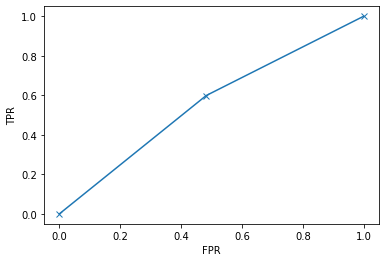

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3) #creates the classifier with the neighbors #
fit = knn.fit(train_features,train_labels) #fits the training data
pred = fit.predict(test_features) #predicts the test data

print(confusion_matrix(test_labels, pred)) #evaluate the model with the confusion matrix, now using the test
print(accuracy_score(test_labels,pred)) #evaluate the model with the accuracy score, now using the test


fpr, tpr, thresholds = roc_curve(test_labels,pred)
plt.plot(fpr,tpr, "x-")
plt.xlabel("FPR") #false positive rate
plt.ylabel("TPR") #true positive rate

auc = roc_auc_score(test_labels, pred) #area under the curve; closer to 1 the better
print("auc:",auc)

The KNN classifier shows a fairly low accuracy in predicting the movie likes and dislikes based on the scoring data. The confusion matrix shows about 379 false positives predicitons, the number of predictions that were falsely catagorized as a 'liked' movie, and 369 false negatives, the number of predicaitons falsely catagorized as dislikes. Additionally, the ROC cuve shows a line only slighly greater than .5, meaning the predictions are just a little better than a guess. Based on these results, the KNN may not be the best classifier for the scored data.

## SVM with RBF kernel

0.5395894428152492
[[  0 785]
 [  0 920]]
auc: 0.5


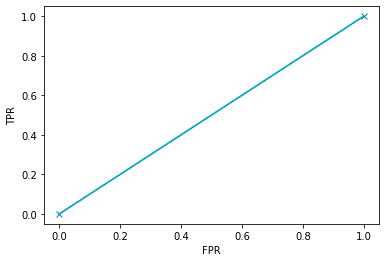

In [18]:
svc_linear = SVC(C = 10, kernel = 'rbf', gamma = .1) 
svc_linear.fit(train_features, train_labels) 
pred2 = svc_linear.predict(test_features) 


print(accuracy_score(test_labels,pred2))
print(confusion_matrix(test_labels,pred2))


fpr, tpr, thresholds = roc_curve(test_labels,pred2) 
plt.plot(fpr,tpr, "x-")
plt.plot([0, 1], [0, 1],'c--')
plt.xlabel("FPR")
plt.ylabel("TPR")

auc = roc_auc_score(test_labels, pred2)
print("auc:",auc)

# Netflix Comparison

Predicting a movie someone may like or dislike is similar to what the streaming site Netflix does for each viewer's profile. However, Netflix has access to much more personalized data such as all the other shows and movies someone watches and sometimes what rating they give it. Additionally, Netflix has information about other viewers who may watch similar things and can then recommend a movie based on things that these viewers have in common. They also factor in things such as the duration and times someone uses the site for, as well as the devices they watch on. All of these inputs are used to create more specific and more accurate recommendations. Additionally, within each different category on the home page such as "Trending now" or "Comedies", Netflix arranges these rows in order of which movie is most likely to be enjoyed by that specific viewer. So each column in the rows start with the movie Netflix recommends most in that category, even though it is not in the "Recommended" category. Furthermore, the most strongly recommended rows go on top of the home screen, so both the rows and columns of each profile is laid out in a way that puts Netflix's highest recommendations in the front. All this sorting is why it is said that there are "33 million different versions of Netflix", one personalized for each viewer. To be able to create so many predictions and sort movies in such a strong, personalized way is why Netflix needs all these specific factors, and to compare viewers with similar taste. Without this information it would be much more difficult and less accurate to predict a movie someone may like.


## Sources:

https://help.netflix.com/en/node/100639

https://neilpatel.com/blog/how-netflix-uses-analytics/